# CS171-EE142 - Spring 2021 - Homework 1

# Due: Wednesday, April 14, 2021 @ 11:59pm

### Maximum points: 75 pts


## Submit your solution as a single jupyeter notebook at iLearn.



### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter): Dumitru Chiriac  <br>
    Your student ID (submitter): 862126186
    
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>


## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


# Overview 
In this assignment you will explore some basic computations on data and build a nearest neighbor classifier.  

For this assignment we will use the functionality of Pandas (https://pandas.pydata.org/), Matplotlib (https://matplotlib.org/), and Numpy (http://www.numpy.org/). You may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.


Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it). When in doubt, please ask. 


Before you start, make sure you have installed all those packages in your local Jupyter instance


## Read *all* cells carefully and answer all parts (both text and missing code)

1.   List item
2.   List item



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
# make sure you import here everything else you may need
import math

# Question 0: Getting real data [0 pts]
In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris

In [5]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


This data has 150 samples. Each sample has 4 features that are given as ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] and one label. 

The label has three possible values ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [6]:
data.shape
# data.head(5)
# data.tail(5)

(150, 5)

In [9]:
data['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can visualize pair-wise relations among 4 features in the data using scatterplot of all pairs of features and color the points by class label 

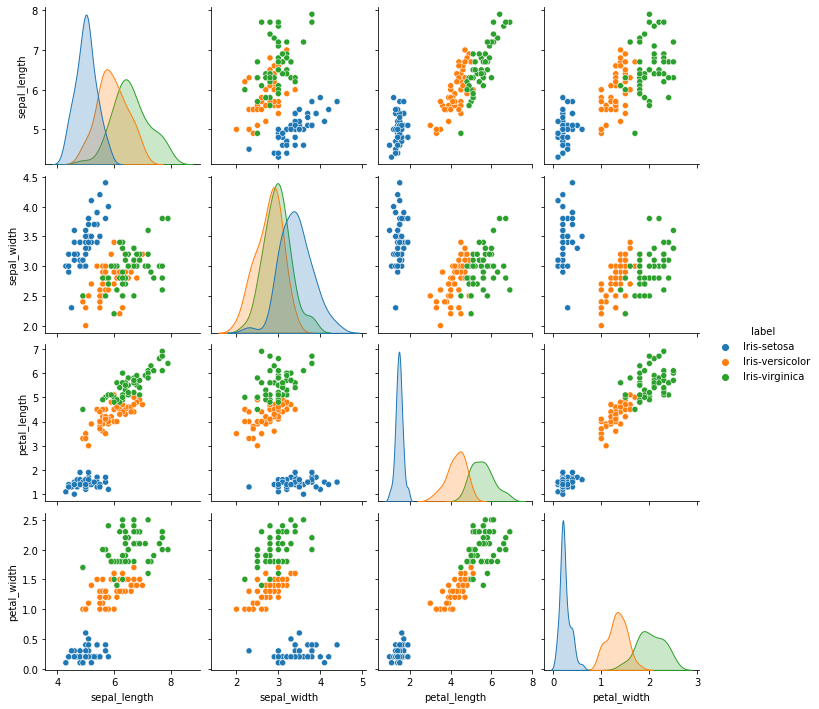

In [6]:
sb.pairplot(data, hue = 'label')

## Question 1: Basic data analysis [25 pts]

## Question 1a: Counting and simple statistics [5]

1. Calculate and print the mean value of each of the four features in the entire dataset [1]

1. Count and print the number of samples that belong to each of the three categories [1] 

1. Calculate and print the mean of each feature for each each label as a $3\times 4$ table. [3]

In [7]:
# your code here 
# problem 1
msl = data["sepal_length"].mean()
msw = data["sepal_width"].mean()
mpl = data["petal_length"].mean()
mpw = data["petal_width"].mean()
print("mean sepal length: ", msl)
print("mean sepal width: ", msw)
print("mean petal legth: ", mpl)
print("mean petal width: ", mpw)

mean sepal length:  5.843333333333335
mean sepal width:  3.0540000000000007
mean petal legth:  3.7586666666666693
mean petal width:  1.1986666666666672


In [8]:
# problem 2
data["label"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

In [9]:
# problem 3
data.groupby("label").mean()

,sepal_length,sepal_width,petal_length,petal_width
label,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### Question 1b: Implement the $\ell_p$ distance function [10]
1. Write code that implements the Lp distance function between two data points as we saw it in class [7]
2. Verify that it is correct by comparing it for p=1 and p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [3]

In [10]:
# your code here
# get values of given row sans label
def row(index):
    row = [data['sepal_length'][index], data['sepal_width'][index], data['petal_length'][index], data['petal_length'][index]]
    return np.array(row)
# problem 1
def dist(v1,v2,p):
    v = abs(v1 - v2)
    tot = 0
    for i in v:
        tot += i ** p
    tot = tot ** (1.0/p)
    return tot

In [11]:
# problem 2

a = row(1)
b = row(2)
# distance via LpDistfunc
print("dist (LpDst, p = 1): ", dist(a,b,1))
print("dist (LpDst, p = 2): ", dist(a,b,2))
# distance via numpy 
print("dist (numpy, p = 1): ", np.linalg.norm(a-b,1))
print("dist (numpy, p = 2): ", np.linalg.norm(a-b,2))

dist (LpDst, p = 1):  0.6000000000000001
dist (LpDst, p = 2):  0.31622776601683805
dist (numpy, p = 1):  0.6000000000000001
dist (numpy, p = 2):  0.31622776601683805


### Question 1c: Compute the distance matrix between all data points [10]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [3]
2. Plot the above matrix and include a colorbar. [3]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [2]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [2]

<function matplotlib.pyplot.show(close=None, block=None)>

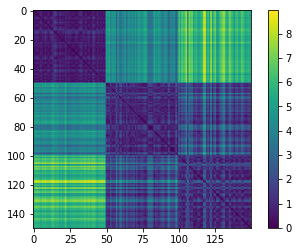

In [12]:
# your code here
# problem 1
ar = [[0 for i in range(150)] for j in range(150)]
for i in range(150):
    for j in range(150):
        ar[i][j] = dist(row(i),row(j), 2) #dist for p = 2
# problem 2
plt.imshow(ar)
plt.colorbar()
plt.show

Your answer here:  
3. N^2/2, because the matrix is symetric as i = 2, j = 3 yeilds the same result as i = 3, j = 2  
4. You can see that there are 9 distinct squares in the plot. This is the case as the members of each class are very close to each other in terms of distance. The squares in the diagonal are members of the same class. Other squares are a result of the comparison of members in different classes.

## Question 2: K-Nearest Neighbors Classifier [50]
The K-Nearest Neighbors Classifier is one of the most popular instance-based (and in general) classification models. In this question, we will implement our own version and test in different scenarios.

### Question 2a: Implement the K-NN Classifier [30]
For the implementation, your function should have the format:
```python
def knnclassify(test_data,training_data, training_labels, K=1):
```
where 'test_data' contains test data points, 'training_data' contains training data points, 'training_labels' holds the training labels, and 'K' is the number of neighbors. 

The output of this function should be 'pred_labels' which contains the predicted label for each test data point (it should, therefore, have the same number of rows as 'test_data').


The piece of code below prepares the Iris dataset by converting the labels from strings to integers (which is quite easier to move around and do calculations with):

In [13]:
all_vals = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels

In [14]:
#your code here
def knnclassify(test_data,training_data, training_labels, K=1):
    pred_labels = [0 for i in range (len(test_data))]
    index = list(range(len(training_data)))
    sample = rand.sample(index, K) #choose k random values from index to get the indexes of the data to test
    for i in range(len(test_data)): #predict label for each index in pred_labels
        min_i = 0 #index of min dist found
        dst = [10000]*K #holds neighboors of min distance, 10000 is an initial number that will be replaced with the new mins
        dsti = [10000]*K #holds index of the object in training data 
        for j in range(len(training_data)):
            dis = dist(test_data[i], training_data[j],2) #for p = 2
            dis_i = 0
            #find largest d value in dst
            if(K == 1):
                dis_i = 0
            else:
                for f in range(K):
                    if (dst[dis_i] <= dst[f]):
                        dis_i = f
            #replace largest value
            if(dst[dis_i] >= dis):
                dsti[dis_i] = j
                dst[dis_i] = dis 
        #find the most represented class in dst
        t0 = 0
        t1 = 0
        t2 = 0
        type = 0
        if (K == 1):
             type = training_labels[dsti[0]]
        else:
            for z in range(K):
                #print("dsti: ", dsti[z])
                if(training_labels[dsti[z]] == 0): t0 += 1
                if(training_labels[dsti[z]] == 1): t1 += 1
                if(training_labels[dsti[z]] == 2): t2 += 1

            if(t0 > t1):
                if(t0 > t2):
                    type = 0
                else:
                    type = 2
            else:
                if(t1 > t2):
                    type = 1
                else:
                    type = 2
        
        
        pred_labels[i] = type
    return pred_labels

### Question 2b: Measuring performance [20]

In this question you will have to evaluate the average performance of your classifier for different values of $K$. In particular, $K$ will range in $\{1,\cdots,10\}$. We are going to measure the performance using classification accuracy. For computing the accuracy, you may use
```python
accuracy = sum(test_labels == pred_labels)/len(test_labels)
```
where 'test_labels' are the actual class labels and 'pred_labels' are the predicted labels


In order to get a proper estimate for the accuracy for every K, we need to run multiple iterations where for each iteration we get a different randomized split of our data into train and test. In this question, we are going to run 100 iterations for every K, and for every random splitting, you may use:

```python
    (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
```
where the train/test ratio is 70/30. 

After computing the accuracy for every $K$ for every iteration, you will have 100 accuracies per $K$. The best way to store those accuracies is in a matrix that has as many rows as values for $K$ and 100 columns, each one for each iteration.

Compute average accuracy as a function of $K$. Because we have a randomized process, we also need to compute how certain/uncertain our estimation for the accuracy per $K$ is. For that reason, we also need to compute the standard deviation of the accuracy for every $K$. Having computed both average accuracy and standard deviation, make a figure that shows the average accuracy as a function of $K$ with each point of the figure being surrounded by an error-bar encoding the standard deviation. You may find 
```python
plt.errorbar()
```
useful for this plot.

In [16]:
#your code here
K = [[0]*100]*10
avg = [0]*10 #list for average
var = [0]*10 #list for variance
std = [0]*10 #list for standard deviation
#run KNN and fill K and get avg
for f in range(10):
    tot = 0
    print("running K = ", f + 1)
    for j in range(100):
        
        (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
        pred_labels = knnclassify(test_data, training_data, training_labels, f + 1)
        accuracy = sum(test_labels == pred_labels)/len(test_labels)
        K[f][j] = accuracy
        tot += K[f][j]
    avg[f] = tot/100

#variance
for f in range(10):
    for j in range(100):
        var[f] += (avg[f] - K[f][j]) ** 2
    
#stdev
for f in range(10):
    std[f] = (var[f] / 100) ** (1/2)
   


running K =  1
running K =  2
running K =  3
running K =  4
running K =  5
running K =  6
running K =  7
running K =  8
running K =  9
running K =  10


In [ ]:
#plot
x = range(1,11)
y = avg
#plot from https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/#:~:text=errorbar()%20method%20is%20used,the%20x%20and%20y%20directions.
fig, ax = plt.subplots()
ax.errorbar(x, y,
            yerr=std,
            fmt='-o')
ax.set_xlabel('K')
ax.set_ylabel('Average')
plt.show